In [1]:
import numpy as np
import pandas as pd
from copulae import StudentCopula
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
sns.mpl.rc("figure", figsize=(8, 8))

from statsmodels.distributions.copula.api import (CopulaDistribution, StudentTCopula)


In [2]:
quantiles = stats.beta.ppf([0.98, 0.99, 0.995], 1, 2)

mean_target = 0.0001
std_target = 0.005
k2 = np.array([0.02, 0.01, 0.005])
quantile_target = mean_target + np.sqrt(1-k2) * std_target  # ≈ 0.00167
np.sum(((quantiles-quantile_target)/quantile_target)**2)

92666.7022839692

0.0008177419649016733 1.0011068251554947


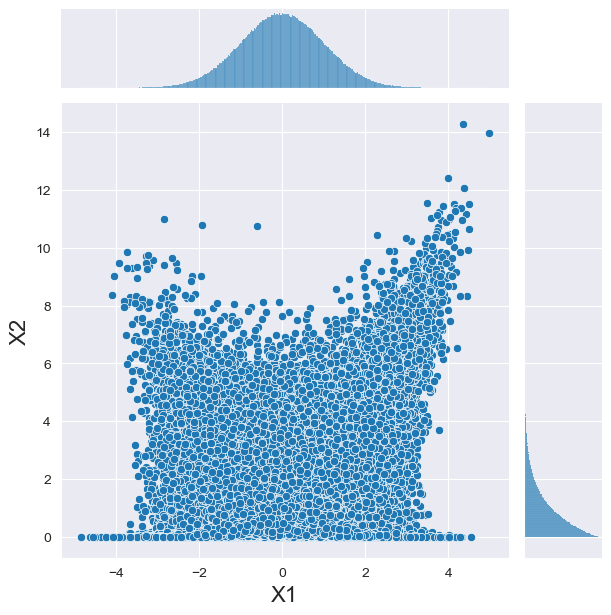

In [7]:
rdn_seed=1234
np.random.seed(rdn_seed)

n_samples = 1_000_000

df = 2

rho = 0.6  # Desired correlation
corr_matrix = np.array([[1, rho],
                        [rho, 1]])

t_copula = StudentCopula(dim=2, df=df)

# set correlation matrix
t_copula[:] = corr_matrix

# Sample from the t-copula
uniform_samples = t_copula.random(n_samples)

# Marginal 1: Normal Distribution (mean=0, std=1)
marginal1 = stats.norm.ppf(uniform_samples[:, 0])

# Marginal 2: Exponential Distribution (scale=1)
marginal2 = stats.expon.ppf(uniform_samples[:, 1])


h = sns.jointplot(x=marginal1, y=marginal2, kind="scatter")
_ = h.set_axis_labels("X1", "X2", fontsize=16)

print(marginal1.mean(), marginal2.std())

[-4.20988392e-04  9.99936397e-01] (1000000, 2)


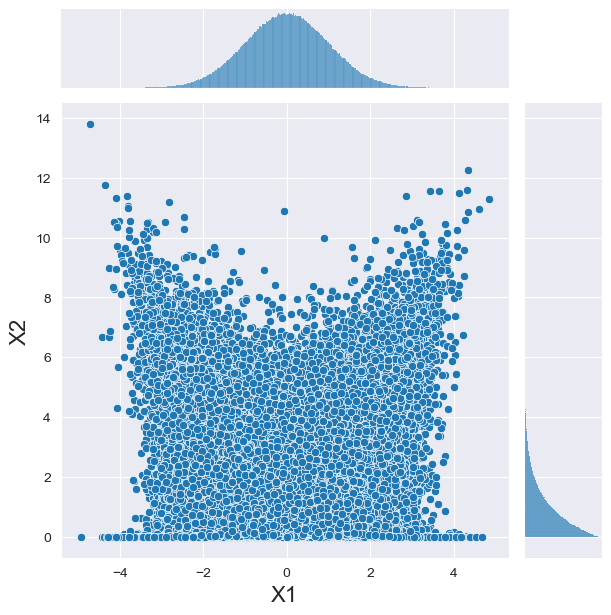

In [6]:
marginals = [stats.norm(), stats.expon()]
joint_dist = CopulaDistribution(copula= StudentTCopula(k_dim=2, df=2), marginals=marginals)
sample = joint_dist.rvs(1_000_000, random_state=rdn_seed)
h = sns.jointplot(x=sample[:, 0], y=sample[:, 1], kind="scatter")
_ = h.set_axis_labels("X1", "X2", fontsize=16)

print(sample.mean(axis=0), sample.shape)